# Open Images data preparation

The goal of this notebook is to get the public Open Images data formatted in such a way it can be used with Detectron2.

To download the Open Images, we're using the following script:
- https://github.com/spmallick/learnopencv/blob/master/downloadOpenImages/downloadOI.py

We need to format the images downloaded using the script into Detectron2 style:
- https://detectron2.readthedocs.io/tutorials/datasets.html

Detectron2 example style:
```
{'annotations': [{'bbox': [994, 619, 1445, 1166],
   'bbox_mode': <BoxMode.XYXY_ABS: 0>,
   'category_id': 0,
   'iscrowd': 0,
   'segmentation': [[1020.5,
     963.5,
     1000.5,
     841.5,
		 ... #### Truncated ####
     989.5,
     1020.5,
     963.5]]}],
 'file_name': 'balloon/train/34020010494_e5cb88e1c4_k.jpg',
 'height': 1536,
 'image_id': 0,
 'width': 2048}
```

An example notebook using Detectron2 style inputs can be found here: https://colab.research.google.com/drive/16jcaJoc6bCFAQ96jDe2HwtXj7BMD_-m5

We'll start by downloading a few sample images, then build a little script which converts the samples to Detectron2 style before ramping it up.

In [4]:
# # Install wget
# import sys
# !conda install --yes --prefix {sys.prefix} -c anaconda wget

In [5]:
# # Download required meta-files
# !wget https://storage.googleapis.com/openimages/2018_04/class-descriptions-boxable.csv
 
# !wget https://storage.googleapis.com/openimages/2018_04/train/train-annotations-bbox.csv
 
# !wget https://storage.googleapis.com/openimages/2018_04/validation/validation-annotations-bbox.csv
 
# !wget https://storage.googleapis.com/openimages/2018_04/test/test-annotations-bbox.csv 

In [6]:
# Classes of amenities Airbnb mostly cares about
subset = ["Toilet",
          "Swimming_pool",
          "Bed",
          "Biliard_table",
          "Sink",
          "Fountain",
          "Oven",
          "Ceiling_fan",
          "Television",
          "Microwave_oven",
          "Gas_stove",
          "Refrigerator",
          "Kitchen_&_dining_room_table",
          "Washing_machine",
          "Bathtub",
          "Stairs",
          "Fireplace",
          "Pillow",
          "Mirror",
          "Shower",
          "Couch",
          "Countertop",
          "Coffeemaker",
          "Dishwasher",
          "Sofa_bed",
          "Tree_house",
          "Towel",
          "Porch",
          "Wine_rack",
          "Jacuzzi"]

In [10]:
# Install tqdm & awscli
#!conda install --yes --prefix {sys.prefix} -c conda-forge tqdm awscli

In [11]:
# Download bathtub and toilet images
!python3 downloadOI.py --classes 'Bathtub,Toilet' --mode validation

Class 0 : Bathtub
Class 1 : Toilet
Annotation Count : 43
Number of images to be downloaded : 39
100%|███████████████████████████████████████████| 39/39 [00:50<00:00,  1.29s/it]


## Converting images/labels to Detectron2 style
Now I've got images ready, my goal is to now convert their current style them into Detectron2 style (see below).

Current style:
- Filepath: `validation/Toilet/0d0719cfd8e417b7.jpg`
- Label filename: `0d0719cfd8e417b7.txt`
- Image filename: `0d0719cfd8e417b7.jpg`
- Contents of label file: `Toilet,0.093371,0.986232,0.189984,0.965806`

I'll need a way to:
1. Traverse different file paths
2. Gather filenames and explore their text contents
3. Seek duplicates and make sure they contain multiple labels

What I should end up with is:
- A single file of images (can convert this to train/test later)
- A dictionary of all of the different parameters for each image path
    - Perhaps I could do this with a Pandas dataframe? So it's visual? Then convert it to JSON maybe?

In [14]:
detectron2_style = {
   'annotations': [{'bbox': [994, 619, 1445, 1166],
   'bbox_mode': BoxMode.XYXY_ABS,
   'category_id': 0,
   'iscrowd': 0,
   'segmentation': [[1020.5,
     963.5,
     1000.5,
     841.5,
     #### Truncated ####
     989.5,
     1020.5,
     963.5]]}],
 'file_name': 'balloon/train/34020010494_e5cb88e1c4_k.jpg',
 'height': 1536,
 'image_id': 0,
 'width': 2048
}

NameError: name 'BoxMode' is not defined

In [16]:
import pandas as pd
df = pd.DataFrame()
df

""


In [20]:
import os
file_ids = [os.path.splitext(file)[0] for file in os.listdir("validation/Toilet")]
len(file_ids), len(set(file_ids))       

(50, 25)

In [26]:
unique_ids = list(set(file_ids))
#unique_ids

In [24]:
df["image_id"] = unique_ids

In [37]:
%%time
img_files = []
label_files = []
for path, dirnames, filenames in os.walk("validation"):
    for file in filenames:
        if ".jpg" in file:
            #print(os.path.join(path, file))
            img_files.append(os.path.join(path, file))
        else:
            label_files.append(os.path.join(path, file))
            #print(os.path.join(path, file))
        #img_files = set(img_files.append(os.path.join(path, file)))
img_files, label_files

CPU times: user 569 µs, sys: 1.07 ms, total: 1.64 ms
Wall time: 1.97 ms


(['validation/Toilet/d60e1c25e87d8b45.jpg',
  'validation/Toilet/17f698ec871569ca.jpg',
  'validation/Toilet/7c2825a3d8e0ed29.jpg',
  'validation/Toilet/40a69f79da2aeaaa.jpg',
  'validation/Toilet/b2dc8e2437e8803f.jpg',
  'validation/Toilet/e6e05b56799fefba.jpg',
  'validation/Toilet/c1eefc708000b69f.jpg',
  'validation/Toilet/b3a65783709539de.jpg',
  'validation/Toilet/0d0719cfd8e417b7.jpg',
  'validation/Toilet/3454c87a14067798.jpg',
  'validation/Toilet/e108d68162990dfb.jpg',
  'validation/Toilet/2f0a18a409d5a769.jpg',
  'validation/Toilet/217b95a71cb220f8.jpg',
  'validation/Toilet/3a511ef0f68cc438.jpg',
  'validation/Toilet/be84a3da54658167.jpg',
  'validation/Toilet/36d8c654fba5f337.jpg',
  'validation/Toilet/47ab0e73c33bdefd.jpg',
  'validation/Toilet/c7312a8b436f5e90.jpg',
  'validation/Toilet/b821cc12eede040e.jpg',
  'validation/Toilet/85ccc93d1f941931.jpg',
  'validation/Toilet/eaa75967cbc70ac1.jpg',
  'validation/Toilet/2ff2bb609a057f7a.jpg',
  'validation/Toilet/539e0871494

In [40]:
os.path.splitext(img_files[0])[0].split("/")

['validation', 'Toilet', 'd60e1c25e87d8b45']

In [44]:
%%time
img_details = []
for img_path in img_files:
    dataset, label, img_id = os.path.splitext(img_path)[0].split("/")
    img_detail = {
        "dataset": dataset,
        "label": label,
        "id": img_id,
        "file_name": img_path
    }
    img_details.append(img_detail)
img_details

CPU times: user 127 µs, sys: 1 µs, total: 128 µs
Wall time: 131 µs


[{'dataset': 'validation',
  'label': 'Toilet',
  'id': 'd60e1c25e87d8b45',
  'file_name': 'validation/Toilet/d60e1c25e87d8b45.jpg'},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': '17f698ec871569ca',
  'file_name': 'validation/Toilet/17f698ec871569ca.jpg'},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': '7c2825a3d8e0ed29',
  'file_name': 'validation/Toilet/7c2825a3d8e0ed29.jpg'},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': '40a69f79da2aeaaa',
  'file_name': 'validation/Toilet/40a69f79da2aeaaa.jpg'},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': 'b2dc8e2437e8803f',
  'file_name': 'validation/Toilet/b2dc8e2437e8803f.jpg'},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': 'e6e05b56799fefba',
  'file_name': 'validation/Toilet/e6e05b56799fefba.jpg'},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': 'c1eefc708000b69f',
  'file_name': 'validation/Toilet/c1eefc708000b69f.jpg'},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': 'b3a65

In [53]:
# Now let's get bounding box information
label_details = []
for label_path in label_files:
    dataset, label, img_id = os.path.splitext(label_path)[0].split("/")
    with open(label_path, "r") as file:
        data = file.read().replace("\n", "").split(",")
        XMin, XMax, YMin, YMax = data[1], data[2], data[3], data[4]
        # bbox dimensions = XMin, XMax, YMin, YMax
        #bbox = [float(i) for i in [data[1], data[2], data[3], data[4]]]
        
    label_detail = {
        "dataset": dataset,
        "label": label,
        "id": img_id,
        "bbox": [XMin, XMax, YMin, YMax]
    }
    label_details.append(label_detail)
label_details

[{'dataset': 'validation',
  'label': 'Toilet',
  'id': 'e108d68162990dfb',
  'bbox': ['0.360770', '0.656517', '0.410382', '0.886037']},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': '217b95a71cb220f8',
  'bbox': ['0.438669', '0.602654', '0.449081', '0.532643']},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': '2f0a18a409d5a769',
  'bbox': ['0.000008', '0.546224', '0.349488', '0.999980']},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': '36d8c654fba5f337',
  'bbox': ['0.063034', '0.805088', '0.000000', '0.697051']},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': '47ab0e73c33bdefd',
  'bbox': ['0.197381', '0.922556', '0.468605', '0.829202']},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': 'c7312a8b436f5e90',
  'bbox': ['0.483064', '0.583230', '0.148464', '0.254009Toilet']},
 {'dataset': 'validation',
  'label': 'Toilet',
  'id': 'be84a3da54658167',
  'bbox': ['0.246185', '0.776473', '0.728370', '1.000000']},
 {'dataset': 'validation',
  'label

In [56]:
with open("validation/Toilet/c7312a8b436f5e90.txt", "r") as file:
    data = file.readlines()
    
data

['Toilet,0.483064,0.583230,0.148464,0.254009\n',
 'Toilet,0.756245,0.872021,0.377751,0.570644\n']

In [43]:
df = pd.DataFrame(img_details)
df

,dataset,label,id,file_name
0,validation,Toilet,d60e1c25e87d8b45,validation/Toilet/d60e1c25e87d8b45.jpg
1,validation,Toilet,17f698ec871569ca,validation/Toilet/17f698ec871569ca.jpg
2,validation,Toilet,7c2825a3d8e0ed29,validation/Toilet/7c2825a3d8e0ed29.jpg
3,validation,Toilet,40a69f79da2aeaaa,validation/Toilet/40a69f79da2aeaaa.jpg
4,validation,Toilet,b2dc8e2437e8803f,validation/Toilet/b2dc8e2437e8803f.jpg
5,validation,Toilet,e6e05b56799fefba,validation/Toilet/e6e05b56799fefba.jpg
6,validation,Toilet,c1eefc708000b69f,validation/Toilet/c1eefc708000b69f.jpg
7,validation,Toilet,b3a65783709539de,validation/Toilet/b3a65783709539de.jpg
8,validation,Toilet,0d0719cfd8e417b7,validation/Toilet/0d0719cfd8e417b7.jpg
9,validation,Toilet,3454c87a14067798,validation/Toilet/3454c87a14067798.jpg


# FIGURED IT OUT

Why am I doing such hard work manipulating images when I could just use their own annotation files?

Why give a sh*t about the text files for labels when I've already got validation-annotations-bbox.csv... and the same with train-annotations-bbox.csv... derp. Time to use both of these to my advantage and just manipulate the images to be in the folders I want them in.

I should write a function which:
- Gets my image IDs
- Matches them with their details in the annotations csv 
- Saves their file name

In [71]:
val_annot = pd.read_csv("validation-annotations-bbox.csv")
val_annot

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside
0,0001eeaf4aed83f9,freeform,/m/0cmf2,1,0.022464,0.964178,0.070656,0.800164,0,0,0,0,0
1,000595fe6fee6369,freeform,/m/02wbm,1,0.000000,1.000000,0.000233,1.000000,0,0,1,0,0
2,000595fe6fee6369,freeform,/m/02xwb,1,0.141030,0.180277,0.676262,0.732455,0,0,0,0,0
3,000595fe6fee6369,freeform,/m/02xwb,1,0.213781,0.253028,0.298764,0.354956,1,0,0,0,0
4,000595fe6fee6369,freeform,/m/02xwb,1,0.232926,0.288447,0.488954,0.545146,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
204616,ffff21932da3ed01,freeform,/m/03fp41,1,0.177790,0.710296,0.412302,0.578570,0,0,1,0,0
204617,ffff21932da3ed01,freeform,/m/05s2s,1,0.000000,0.031963,0.502994,0.562275,1,1,0,0,0
204618,ffff21932da3ed01,freeform,/m/0c9ph5,1,0.323775,0.409382,0.464495,0.554111,0,0,1,0,0
204619,ffff21932da3ed01,freeform,/m/0c9ph5,1,0.540223,0.624863,0.493633,0.577892,1,0,1,0,0


In [72]:
classes = pd.read_csv("class-descriptions-boxable.csv", names=["id", "ClassName"])
classes

,id,ClassName
0,/m/011k07,Tortoise
1,/m/011q46kg,Container
2,/m/012074,Magpie
3,/m/0120dh,Sea turtle
4,/m/01226z,Football
...,...,...
596,/m/0qmmr,Wheelchair
597,/m/0wdt60w,Rugby ball
598,/m/0xfy,Armadillo
599,/m/0xzly,Maracas


In [87]:
%%time
# Create classname column on annotations which converts label codes to string labels
val_annot["ClassName"] = val_annot["LabelName"].map(classes.set_index("id")["ClassName"])
val_annot["ClassName"]

CPU times: user 29.7 ms, sys: 3.32 ms, total: 33 ms
Wall time: 31.8 ms


0           Airplane
1               Food
2              Fruit
3              Fruit
4              Fruit
             ...    
204616    Houseplant
204617         Plant
204618        Flower
204619        Flower
204620      Building
Name: ClassName, Length: 204621, dtype: object

# Move all images into one file (images)
Since I've already got a key (the annotations CSV), I'm going to move all the images into one file and manipulate them later.

In [90]:
# Take these and move them into one file
img_files[:3]

['validation/Toilet/d60e1c25e87d8b45.jpg',
 'validation/Toilet/17f698ec871569ca.jpg',
 'validation/Toilet/7c2825a3d8e0ed29.jpg']

In [91]:
# Make directory with images
os.mkdir("images")

In [92]:
# Copy images files to images
import shutil
for image in img_files:
    shutil.copy2(image, "images")

In [93]:
len(os.listdir("images")), len(img_files)

(38, 39)

In [109]:
import numpy as np
len(np.unique([i.split("/")[2] for i in img_files]))

38

In [115]:
os.listdir("images")[:5]

['d60e1c25e87d8b45.jpg',
 '2f2039140c8b1f2b.jpg',
 '17f698ec871569ca.jpg',
 '7c2825a3d8e0ed29.jpg',
 '40a69f79da2aeaaa.jpg']

In [117]:
# Make list of images we have and split them off the dataframe with all the label information
my_images = [os.path.splitext(img_name)[0] for img_name in os.listdir("images")]
my_images

['d60e1c25e87d8b45',
 '2f2039140c8b1f2b',
 '17f698ec871569ca',
 '7c2825a3d8e0ed29',
 '40a69f79da2aeaaa',
 'b2dc8e2437e8803f',
 'e6e05b56799fefba',
 'c1eefc708000b69f',
 'b3a65783709539de',
 '0d0719cfd8e417b7',
 '3454c87a14067798',
 '784bba5f12ee7c35',
 'e108d68162990dfb',
 '837b3d11ff02f116',
 '2f0a18a409d5a769',
 '217b95a71cb220f8',
 '3a511ef0f68cc438',
 'be84a3da54658167',
 '36d8c654fba5f337',
 '47ab0e73c33bdefd',
 '789cc0283c0e18af',
 'c7312a8b436f5e90',
 'eccb080e57b2aac5',
 '11dcac4ca5923a58',
 'b821cc12eede040e',
 '85ccc93d1f941931',
 '15348e4f2c7ebe0f',
 '822f20d881eebeb9',
 'eaa75967cbc70ac1',
 '2ff2bb609a057f7a',
 'ddd3f96ff7f0bc78',
 'd7d469cb4c7e8cd2',
 '539e0871494dea5d',
 '42298c9659ce6603',
 '8e562fee6ff208f7',
 'cd727c5e0d2cfc1b',
 'f90eac5444f62b19',
 '3f66fdf9688514d4']

In [122]:
subset

['Toilet',
 'Swimming_pool',
 'Bed',
 'Biliard_table',
 'Sink',
 'Fountain',
 'Oven',
 'Ceiling_fan',
 'Television',
 'Microwave_oven',
 'Gas_stove',
 'Refrigerator',
 'Kitchen_&_dining_room_table',
 'Washing_machine',
 'Bathtub',
 'Stairs',
 'Fireplace',
 'Pillow',
 'Mirror',
 'Shower',
 'Couch',
 'Countertop',
 'Coffeemaker',
 'Dishwasher',
 'Sofa_bed',
 'Tree_house',
 'Towel',
 'Porch',
 'Wine_rack',
 'Jacuzzi']

In [125]:
# Make sure we only get the images we're concerned about
my_images_df = val_annot[val_annot["ImageID"].isin(my_images) & val_annot["ClassName"].isin(subset)]
my_images_df.head()

,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName
10797,0d0719cfd8e417b7,freeform,/m/09g1w,1,0.093371,0.986232,0.189984,0.965806,0,0,0,0,0,Toilet
14593,11dcac4ca5923a58,freeform,/m/03dnzn,1,0.360645,0.999988,0.000000,1.000000,0,1,0,0,0,Bathtub
17325,15348e4f2c7ebe0f,freeform,/m/03dnzn,1,0.087330,0.999973,0.600616,0.999962,0,0,0,0,0,Bathtub
17329,15348e4f2c7ebe0f,freeform,/m/065h6l,1,0.090833,1.000000,0.600928,1.000000,0,0,0,0,0,Jacuzzi
19543,17f698ec871569ca,freeform,/m/09g1w,1,0.160562,0.475538,0.181890,0.847251,0,0,0,0,0,Toilet


In [205]:
pd.Categorical(my_images_df.ClassName).codes

array([3, 0, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 1, 0, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 0, 2, 3, 0,
       1, 0, 3, 3, 3, 0, 1, 3], dtype=int8)

In [143]:
my_images_df[my_images_df["ImageID"] == "c7312a8b436f5e90"]["ClassName"].values

array(['Sink', 'Sink', 'Sink', 'Toilet', 'Toilet'], dtype=object)

In [148]:
my_images_df[my_images_df["ImageID"] == "c7312a8b436f5e90"][["XMin", "XMax", "YMin", "YMax"]].values

array([[0.238995, 0.372361, 0.778648, 0.871384],
       [0.461353, 0.615221, 0.322836, 0.441359],
       [0.782433, 0.921636, 0.850595, 0.936918],
       [0.483064, 0.58323 , 0.148464, 0.254009],
       [0.756245, 0.872021, 0.377751, 0.570644]])

In [137]:
len(my_images_df)

52

In [140]:
my_images_df["ImageID"].value_counts()

c7312a8b436f5e90    5
15348e4f2c7ebe0f    2
3a511ef0f68cc438    2
d7d469cb4c7e8cd2    2
d60e1c25e87d8b45    2
3454c87a14067798    2
17f698ec871569ca    2
eccb080e57b2aac5    2
822f20d881eebeb9    2
2f0a18a409d5a769    2
8e562fee6ff208f7    2
e108d68162990dfb    1
539e0871494dea5d    1
be84a3da54658167    1
b821cc12eede040e    1
ddd3f96ff7f0bc78    1
b3a65783709539de    1
eaa75967cbc70ac1    1
85ccc93d1f941931    1
7c2825a3d8e0ed29    1
f90eac5444f62b19    1
2ff2bb609a057f7a    1
789cc0283c0e18af    1
784bba5f12ee7c35    1
2f2039140c8b1f2b    1
11dcac4ca5923a58    1
40a69f79da2aeaaa    1
e6e05b56799fefba    1
c1eefc708000b69f    1
36d8c654fba5f337    1
42298c9659ce6603    1
3f66fdf9688514d4    1
0d0719cfd8e417b7    1
b2dc8e2437e8803f    1
cd727c5e0d2cfc1b    1
47ab0e73c33bdefd    1
217b95a71cb220f8    1
837b3d11ff02f116    1
Name: ImageID, dtype: int64

In [153]:
my_images

['d60e1c25e87d8b45',
 '2f2039140c8b1f2b',
 '17f698ec871569ca',
 '7c2825a3d8e0ed29',
 '40a69f79da2aeaaa',
 'b2dc8e2437e8803f',
 'e6e05b56799fefba',
 'c1eefc708000b69f',
 'b3a65783709539de',
 '0d0719cfd8e417b7',
 '3454c87a14067798',
 '784bba5f12ee7c35',
 'e108d68162990dfb',
 '837b3d11ff02f116',
 '2f0a18a409d5a769',
 '217b95a71cb220f8',
 '3a511ef0f68cc438',
 'be84a3da54658167',
 '36d8c654fba5f337',
 '47ab0e73c33bdefd',
 '789cc0283c0e18af',
 'c7312a8b436f5e90',
 'eccb080e57b2aac5',
 '11dcac4ca5923a58',
 'b821cc12eede040e',
 '85ccc93d1f941931',
 '15348e4f2c7ebe0f',
 '822f20d881eebeb9',
 'eaa75967cbc70ac1',
 '2ff2bb609a057f7a',
 'ddd3f96ff7f0bc78',
 'd7d469cb4c7e8cd2',
 '539e0871494dea5d',
 '42298c9659ce6603',
 '8e562fee6ff208f7',
 'cd727c5e0d2cfc1b',
 'f90eac5444f62b19',
 '3f66fdf9688514d4']

In [154]:
listy_list = []

IndexError: list assignment index out of range

In [ ]:
%%time
# Create images labels setup in detectron2 style
img_dicts = []
for i, img in enumerate(my_images):
    file_path = "images/" + img + ".jpg"
    img_data = my_images_df[my_images_df["ImageID"] == img]
    img_label = img_data["ClassName"].values
    bboxes = img_data[["XMin", "XMax", "YMin", "YMax"]].values
    img_dict = {"file_path": file_path,
                "img_label": img_label,
                "bboxes": bboxes}
    img_dicts.append(img_dict)
img_dicts

In [168]:
%%time
multiple = my_images_df[my_images_df["ImageID"] == "d60e1c25e87d8b45"].reset_index()
for i in range(len(multiple)):
    print(multiple.loc[i])

index                    172106
ImageID        d60e1c25e87d8b45
Source                 freeform
LabelName             /m/0130jx
Confidence                    1
XMin                          0
XMax                   0.823265
YMin                   0.315739
YMax                   0.975746
IsOccluded                    0
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
ClassName                  Sink
Name: 0, dtype: object
index                    172112
ImageID        d60e1c25e87d8b45
Source                 freeform
LabelName              /m/09g1w
Confidence                    1
XMin                   0.405653
XMax                          1
YMin                   0.146613
YMax                   0.626838
IsOccluded                    1
IsTruncated                   0
IsGroupOf                     0
IsDepiction                   0
IsInside                      0
ClassName                Toilet
Name: 1, dtype: o

In [220]:
%%time
category_ids = pd.Categorical(my_images_df["ClassName"]).codes
my_images_df.loc[:, "ClassID"] = category_ids
my_images_df.head()

CPU times: user 1.94 ms, sys: 200 µs, total: 2.14 ms
Wall time: 1.98 ms


/Users/daniel/Desktop/airbnb-project/env/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,ImageID,Source,LabelName,Confidence,XMin,XMax,YMin,YMax,IsOccluded,IsTruncated,IsGroupOf,IsDepiction,IsInside,ClassName,ClassID
10797,0d0719cfd8e417b7,freeform,/m/09g1w,1,0.093371,0.986232,0.189984,0.965806,0,0,0,0,0,Toilet,3
14593,11dcac4ca5923a58,freeform,/m/03dnzn,1,0.360645,0.999988,0.000000,1.000000,0,1,0,0,0,Bathtub,0
17325,15348e4f2c7ebe0f,freeform,/m/03dnzn,1,0.087330,0.999973,0.600616,0.999962,0,0,0,0,0,Bathtub,0
17329,15348e4f2c7ebe0f,freeform,/m/065h6l,1,0.090833,1.000000,0.600928,1.000000,0,0,0,0,0,Jacuzzi,1
19543,17f698ec871569ca,freeform,/m/09g1w,1,0.160562,0.475538,0.181890,0.847251,0,0,0,0,0,Toilet,3


In [219]:
category_ids

array([3, 0, 0, 1, 3, 3, 3, 0, 3, 0, 3, 3, 3, 3, 2, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 1, 0, 3, 0, 0, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 0, 2, 3, 0,
       1, 0, 3, 3, 3, 0, 1, 3], dtype=int8)

In [207]:
targ = my_images_df[my_images_df["ImageID"] == "d60e1c25e87d8b45"]

In [208]:
pd.Categorical(targ.ClassName).codes

array([0, 1], dtype=int8)

In [170]:
multiple.loc[0]["ImageID"]

'd60e1c25e87d8b45'

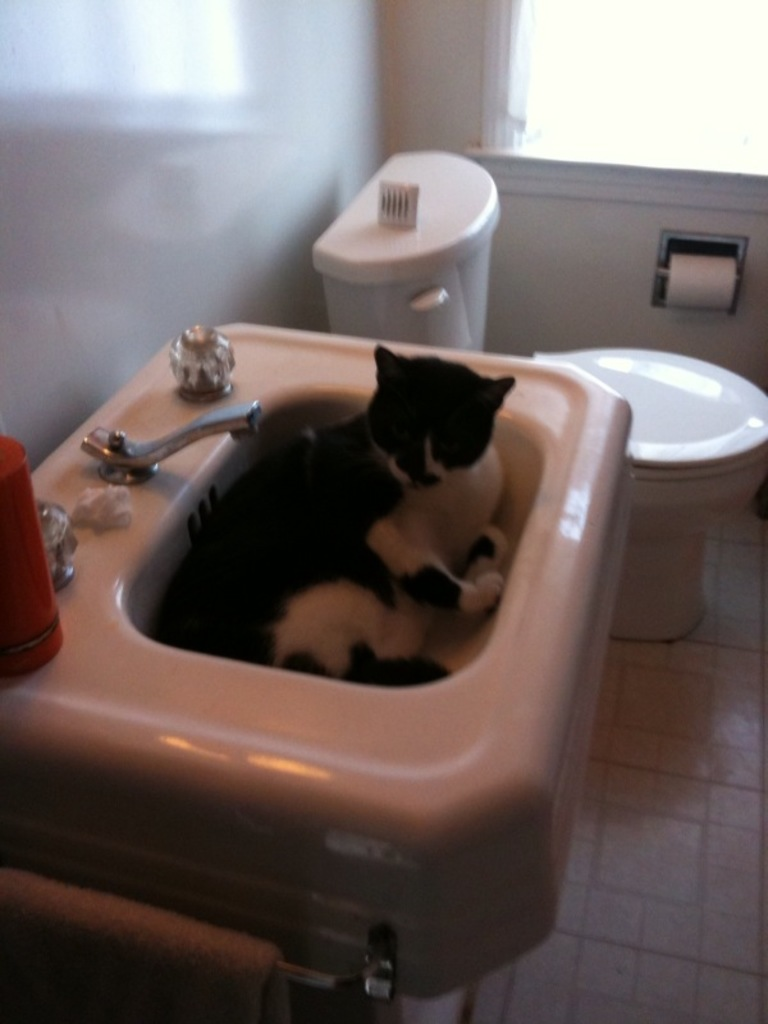

In [191]:
from IPython.display import Image
Image("images/d60e1c25e87d8b45.jpg")

In [225]:
img_dicts[0]

{'filename': 'images/d60e1c25e87d8b45.jpg',
 'image_id': 'd60e1c25e87d8b45',
 'height': 0,
 'width': 0,
 'annotations': [{'bbox': [array([0.0, 0.8232649999999999, 0.315739, 0.9757459999999999],
          dtype=object)],
   'bbox_mode': 0,
   'category_id': 2},
  {'bbox': [array([0.40565300000000004, 1.0, 0.14661300000000002, 0.626838],
          dtype=object)],
   'bbox_mode': 0,
   'category_id': 3}]}

In [224]:
%%time
# Create images labels setup in detectron2 style
img_dicts = []
for img in my_images:
    record = {}
    # Add image metadata
    filename = "images/" + img + ".jpg"
    img_data = my_images_df[my_images_df["ImageID"] == img].reset_index()
    
    record["file_name"] = filename
    record["image_id"] = img
    # TODO - use cv2
    record["height"] = 0
    record["width"] = 0
    
    # Create annotations list (contains labels of images)
    annotations = []
    for i in range(len(img_data)):
        img_label = img_data.loc[i]["ClassName"]
        category_id = img_data.loc[i]["ClassID"]
        #print(f"label: {img_label}")
        bbox = [img_data.loc[i][["XMin", "XMax", "YMin", "YMax"]].values]
        obj = {
            "bbox": bbox,
            "bbox_mode": 0, # TODO
            #"img_label": img_label, # not needed
            "category_id": category_id, 
             #"segmentation": ["poly"], # not needed for bounding boxes
             #"iscrowd": 0 # not included as per detectron2 docs sure of this  
        }
        annotations.append(obj)
        #print(annotations)
    record["annotations"] = annotations
    img_dicts.append(record)
img_dicts

CPU times: user 213 ms, sys: 6.17 ms, total: 219 ms
Wall time: 243 ms


[{'filename': 'images/d60e1c25e87d8b45.jpg',
  'image_id': 'd60e1c25e87d8b45',
  'height': 0,
  'width': 0,
  'annotations': [{'bbox': [array([0.0, 0.8232649999999999, 0.315739, 0.9757459999999999],
           dtype=object)],
    'bbox_mode': 0,
    'category_id': 2},
   {'bbox': [array([0.40565300000000004, 1.0, 0.14661300000000002, 0.626838],
           dtype=object)],
    'bbox_mode': 0,
    'category_id': 3}]},
 {'filename': 'images/2f2039140c8b1f2b.jpg',
  'image_id': '2f2039140c8b1f2b',
  'height': 0,
  'width': 0,
  'annotations': [{'bbox': [array([0.0, 1.0, 0.0, 1.0], dtype=object)],
    'bbox_mode': 0,
    'category_id': 0}]},
 {'filename': 'images/17f698ec871569ca.jpg',
  'image_id': '17f698ec871569ca',
  'height': 0,
  'width': 0,
  'annotations': [{'bbox': [array([0.16056199999999998, 0.475538, 0.18189, 0.847251], dtype=object)],
    'bbox_mode': 0,
    'category_id': 3},
   {'bbox': [array([0.6201770000000001, 0.930982, 0.18248399999999998, 0.813342],
           dtype=obje

In [178]:
len(img_dicts)

38

In [152]:
img_dicts[0]

{'file_path': 'images/d60e1c25e87d8b45.jpg',
 'img_label': array(['Sink', 'Toilet'], dtype=object),
 'bboxes': array([[0.      , 0.823265, 0.315739, 0.975746],
        [0.405653, 1.      , 0.146613, 0.626838]])}

In [138]:
len(img_dicts)

38

# TK: Could I turn this into a script? Instead of it being in a notebook?

In [60]:
import csv
with open("validation-annotations-bbox.csv") as file:
    reader = csv.reader(file)   
reader

TypeError: '_csv.reader' object is not subscriptable

In [64]:
import csv
with open("class-descriptions-boxable.csv") as file:
    reader = csv.reader(file)
    dict_list = {row[1]:row[0] for row in reader}
dict_list

{'Tortoise': '/m/011k07',
 'Container': '/m/011q46kg',
 'Magpie': '/m/012074',
 'Sea turtle': '/m/0120dh',
 'Football': '/m/01226z',
 'Ambulance': '/m/012n7d',
 'Ladder': '/m/012w5l',
 'Toothbrush': '/m/012xff',
 'Syringe': '/m/012ysf',
 'Sink': '/m/0130jx',
 'Toy': '/m/0138tl',
 'Organ': '/m/013y1f',
 'Cassette deck': '/m/01432t',
 'Apple': '/m/014j1m',
 'Human eye': '/m/014sv8',
 'Cosmetics': '/m/014trl',
 'Paddle': '/m/014y4n',
 'Snowman': '/m/0152hh',
 'Beer': '/m/01599',
 'Chopsticks': '/m/01_5g',
 'Human beard': '/m/015h_t',
 'Bird': '/m/015p6',
 'Parking meter': '/m/015qbp',
 'Traffic light': '/m/015qff',
 'Croissant': '/m/015wgc',
 'Cucumber': '/m/015x4r',
 'Radish': '/m/015x5n',
 'Towel': '/m/0162_1',
 'Doll': '/m/0167gd',
 'Skull': '/m/016m2d',
 'Washing machine': '/m/0174k2',
 'Glove': '/m/0174n1',
 'Tick': '/m/0175cv',
 'Belt': '/m/0176mf',
 'Sunglasses': '/m/017ftj',
 'Banjo': '/m/018j2',
 'Cart': '/m/018p4k',
 'Ball': '/m/018xm',
 'Backpack': '/m/01940j',
 'Bicycle': '/m/